In [16]:
import numpy as np
import matplotlib.pylab as plt

# Probabilistic Quantization

In [17]:
def simulate_ADC(users=500, M=2, real_weight=None):
    vals=[None]*users
    h=[None]*users
    real_vector=[]
    wait_of_users=[None]*users

    if real_weight is None:
        for u in range(users):
             weights=np.random.normal(loc=0.4,scale=0.3, size=10)
             wait_of_users[u]=weights
    else:
        wait_of_users=real_weight

    for u in range(users):
       
        weights = wait_of_users[u]

        vals[u]=weights
        h_min = min(weights)
        h_max = max(weights)
        real_val = sum(weights)/len(weights)
        real_vector.append(real_val)
        hs=[None]*M
        for i in range(M):
            hs[i]=h_min+i*(h_max-h_min)/(M-1)
        
        h[u]=hs
        

    sent_vector=[]

    for u in range(users):
        h_u=h[u]
        
        H=0
        for i in range(M):
            H=H+1/abs(real_vector[u]-h_u[i])
        ps=[0]*M
        for i in range(M):
            ps[i]=1/H/abs(real_vector[u]-h_u[i])
            
        sent_val = np.random.choice(h_u,p=ps)
        sent_vector.append(sent_val)

    avg_randomized=[]    
    avg_real=[]
    avg_weight_real=0
    avg_weight_randomized=0
    for u in range(users):
        avg_weight_randomized = (avg_weight_randomized*u + sent_vector[u])/(u+1)
        avg_weight_real = (avg_weight_real*u + real_vector[u])/(u+1)
        avg_randomized.append(avg_weight_randomized)
        avg_real.append(avg_weight_real)
    return wait_of_users, avg_real, avg_randomized
    

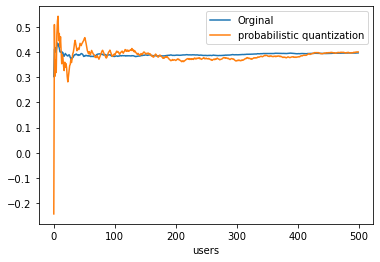

In [18]:
wait_of_users, avg_real, avg_randomized = simulate_ADC(500, 2)
plt.plot(avg_real,label="Orginal")
plt.plot(avg_randomized,label="probabilistic quantization")
plt.xlabel("users")
plt.xlabel("users")
_=plt.legend()

In [19]:
avg_randomized_2=avg_randomized
_, avg_real_4, avg_randomized_4 = simulate_ADC(500, 4,real_weight=wait_of_users)
assert (avg_real == avg_real_4)


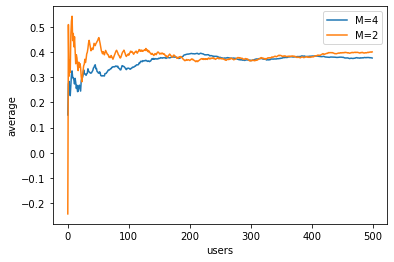

In [20]:
plt.plot(avg_randomized_4,label="M=4")
plt.plot(avg_randomized_2,label="M=2")
plt.xlabel("users")
plt.ylabel("average")
_=plt.legend()